In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, RobustScaler

import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
# import tensorflow as tf
# # Sequential,Dense, LSTM,Dropout, RepeatVector, TimeDistributed, Activation, Flatten

# from keras.models import Sequential
# from keras import regularizers
# from keras.layers import Dense, LSTM,Dropout, RepeatVector, TimeDistributed, Activation, Flatten
# from sklearn.metrics import r2_score, mean_squared_error
# from keras.optimizers import Adam



## 불러오기

data = pd.read_csv('output_rch_Day.csv',parse_dates=['Unnamed: 0'])

col_list = ['Date']
for i in range(1,41):
    col_list.append('TOC_'+str(i))

data.columns = col_list

## kg-> ton으로 바꾸기
data.iloc[:,1:] = data.iloc[:,1:] * (10**-3)
data.iloc[:,1:] = np.log1p(data.iloc[:,1:])



#sequence 데이터
def make_sequence_data(data_x, data_y, window_size, date_data):
    sequence_data = []
    target_data = []

    date_list = []
    for i in range(len(data_x)-window_size):
        
        ## x는 sequence 데이터로 변경
        sequence = data_x[i:i+window_size]
        sequence_data.append(sequence)

        ## 다음날을 예측이므로 y 값 넣기
        target_data.append(data_y[i+window_size])

        ## date 만들기
        date_list.append(date_data[i+window_size])
    return np.array(sequence_data), np.array(target_data).reshape(-1,1), np.array(date_list).reshape(-1,1)


## 함수화 시켜서 window_number 지정만해서 바로 데이터 만들기
def making_xy_data_window(window_number):
    train_seq_data1_x,train_seq_data1_y, train_date1 = make_sequence_data(train_data1.iloc[:,1:40].values, train_data1.iloc[:,40].values, window_size=window_number , date_data=train_data1.iloc[:,0].values  )
    train_seq_data2_x,train_seq_data2_y, train_date2 = make_sequence_data(train_data2.iloc[:,1:40].values, train_data2.iloc[:,40].values, window_size=window_number , date_data=train_data2.iloc[:,0].values )

    #sequence 데이터 합치기
    train_seq_data_x = np.concatenate([train_seq_data1_x, train_seq_data2_x], axis=0)
    train_seq_data_y = np.concatenate([train_seq_data1_y, train_seq_data2_y], axis=0)

    # date 합치기
    train_date = np.concatenate([train_date1, train_date2], axis=0)

    #test 데이터 
    test_seq_data_x,test_seq_data_y, test_date = make_sequence_data(test_data.iloc[:,1:40].values,test_data.iloc[:,40].values, window_size=window_number, date_data=test_data.iloc[:,0].values)
     

    return train_seq_data_x, train_seq_data_y, test_seq_data_x, test_seq_data_y, train_date, test_date

import numpy as np
import pandas as pd

'''
불러온 데이터의 날짜 column 이름 맞추기 여기서는 'Date'로 되어있음
변수는 iloc를 통해 1:40 으로 설정되어있는데 데이터에 맞추어야함
scaler를 적용한 데이터라 가정하고 하였음
'''

## train과 test 나누기
train_data = data[data['Date'] < '2019-01-01']
test_data = data[data['Date'] >= '2019-01-01']



# ## 3/31~5/10일 제외하기위해 분리 후 합치기
train_data1 = train_data[train_data['Date'] <= '2015-03-30']
train_data2 = train_data[train_data['Date'] >= '2015-05-11']
## train_data1, train_data2,test_data 이름을 그대로 갖고가야함
temp_data = pd.concat([train_data1, train_data2])


x_scaler = MinMaxScaler()
temp_data.loc[:,temp_data.columns[1:40]] = x_scaler.fit_transform(temp_data.iloc[:,1:40])
test_data.loc[:,test_data.columns[1:40]] = x_scaler.transform(test_data.iloc[:,1:40])

train_data1 = temp_data[temp_data['Date'] <= '2015-03-30']
train_data2 = temp_data[temp_data['Date'] >= '2015-05-11']


## window_size 설정해주기
x_train,y_train, x_test,y_test,train_date, test_date = making_xy_data_window(window_number =5)

## y_train은 결론적으로 2013년 1월 8일의 데이터부터 존재, y_test는 2019년 1월8일 데이터부터 존재






A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [88]:
train_data1 = train_data[train_data['Date'] <= '2015-03-30']
train_data2 = train_data[train_data['Date'] >= '2015-05-11']
## train_data1, train_data2,test_data 이름을 그대로 갖고가야함
temp_data = pd.concat([train_data1, train_data2])
temp_data
x_scaler = MinMaxScaler()
temp_data.iloc[:, 1:40] = x_scaler.fit_transform(temp_data.iloc[:,1:40])
test_data.iloc[:,1:40] = x_scaler.transform(test_data.iloc[:,1:40])

ValueError: Found array with 0 sample(s) (shape=(0, 39)) while a minimum of 1 is required.

In [35]:
import os
import tensorflow as tf

os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "2" # 사용할 GPU

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    tf.config.experimental.set_virtual_device_configuration(
        gpus[0],
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=8000)]) # 사용할 용량
  except RuntimeError as e:
    # 프로그램 시작시에 가상 장치가 설정되어야만 합니다
    print(e)

# EDA

In [36]:
data = pd.read_csv('output_rch_Day.csv',parse_dates=['Unnamed: 0'])

col_list = ['Date']
for i in range(1,41):
    col_list.append('TOC_'+str(i))

data.columns = col_list
## kg-> ton으로 바꾸기
data.iloc[:,1:] = data.iloc[:,1:] * (10**-3)

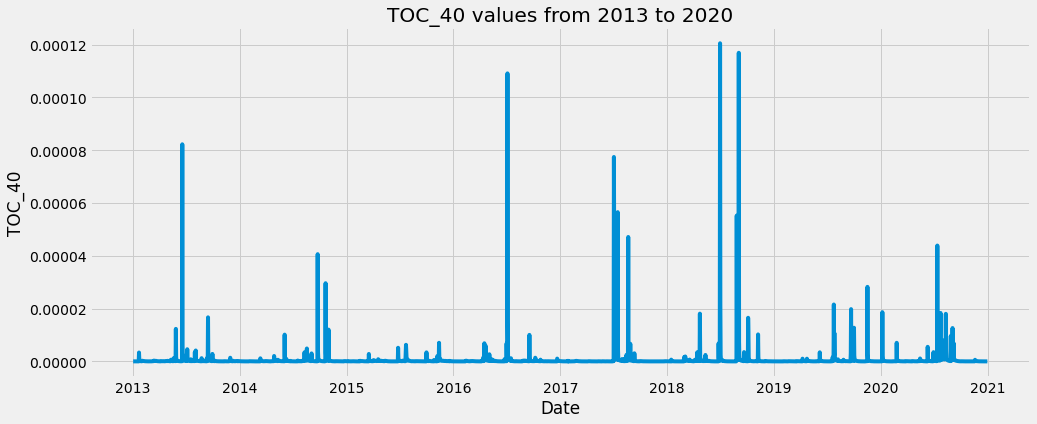

In [37]:
plt.figure(figsize=(15, 6))
plt.plot(data['Date'], data['TOC_37']*10**(-6))
plt.xlabel('Date')
plt.ylabel('TOC_40')
plt.title('TOC_40 values from 2013 to 2020')

plt.show()

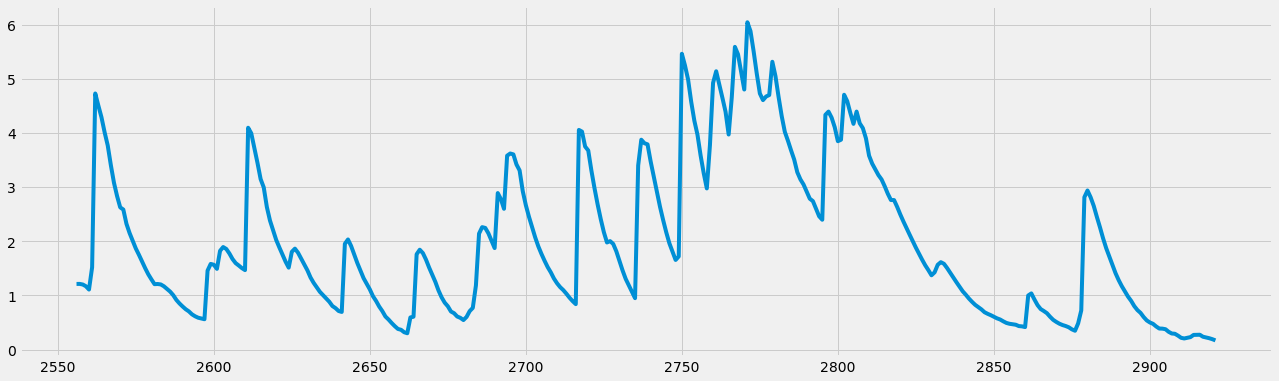

In [38]:
fig, ax = plt.subplots(figsize=(20, 6))
plt.plot(np.log(data[data['Date'].dt.year == 2020]['TOC_40']))

FixedFormatter should only be used together with FixedLocator


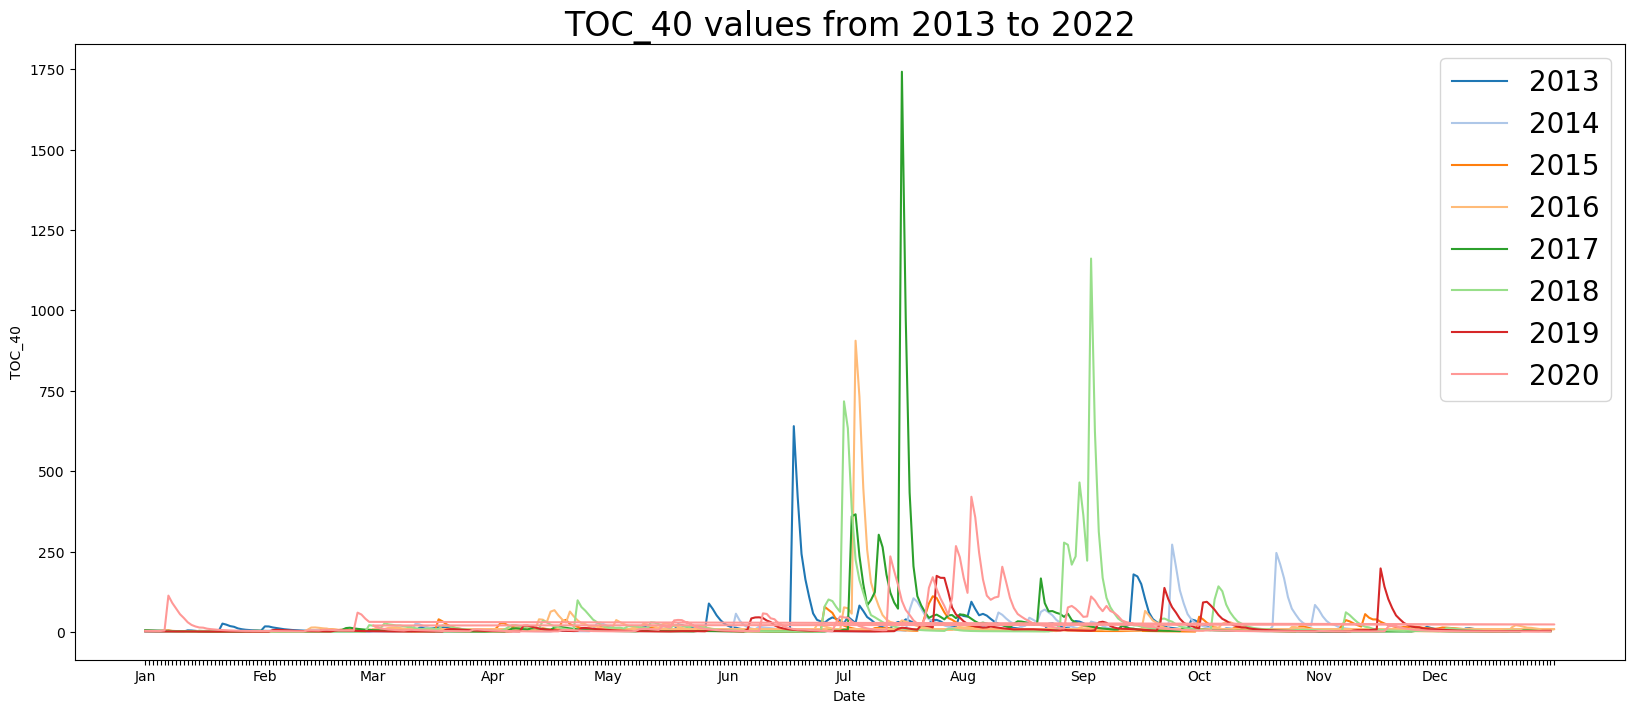

In [ ]:
# 매년 다른 색상으로 겹치게 그래프 그리기
years = data['Date'].dt.year.unique()
colors = plt.cm.tab20.colors[:len(years)]
style.use('default')
fig, ax = plt.subplots(figsize=(20, 8))
plt.rc('font',size=20)
for i, year in enumerate(years):
    
    data_year = data[data['Date'].dt.year == year]
    ax.plot(data_year['Date'].dt.strftime('%m-%d'), data_year['TOC_40'], color=colors[i % len(colors)], label=str(year))

ax.legend(loc='best')
ax.set_xlabel('Date')
ax.set_ylabel('TOC_40')
ax.set_title('TOC_40 values from 2013 to 2022')
months = pd.date_range(start='2022-01-01', end='2022-12-31')
months_list = [x.strftime('%b') if x.strftime('%d') =='01' else '' for x in months]

ax.set_xticklabels(months_list)
# 그래프 출력하기
plt.show()

In [ ]:
months = pd.date_range(start='2022-01-01', end='2022-12-31')
months_list = [x.strftime('%b') if x.strftime('%d') =='01' else '' for x in months]

# 모델링

In [69]:
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
# Sequential,Dense, LSTM,Dropout, RepeatVector, TimeDistributed, Activation, Flatten

from keras.models import Sequential
from keras import regularizers
from keras.callbacks import EarlyStopping
from keras.layers import Dense, LSTM,Dropout, RepeatVector, TimeDistributed, Activation, Flatten, GRU
from sklearn.metrics import r2_score, mean_squared_error
from keras.optimizers import Adam


In [70]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import mean_absolute_error

# GRU

In [71]:
import random
import os
import tensorflow as tf

def seed_everything(seed: int = 42):
    random.seed(seed)
    np.random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    tf.random.set_seed(seed)
    os.environ['TF_DETERMINISTIC_OPS'] = '1'

seed_everything(42)

In [50]:
import tensorflow as tf
#tf.compat.v1.disable_v2_behavior()
import shap
shap.initjs()


#Chargment des packages
import numpy as np
import pandas as pd
import datetime as dt
import os


#Division du Dataset
from sklearn.model_selection import train_test_split

#Modèle et paramétrisation

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import xgboost as xgb 
from xgboost import DMatrix

from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV

from scipy import stats as st
# Explications du modèle
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import pyplot as plt
#pour le tag d'heure

from datetime import datetime


import random

import numpy as np

from pathlib import Path

import time

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional, BatchNormalization
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop
#from keras.optimizers import adam
from keras import optimizers

from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import callbacks  #..callbacks.EarlyStopping

import math
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error

In [74]:
seed_everything(42)

learning_rate = 0.002
optimizer = Adam(lr=learning_rate)


model = Sequential()
model.add(GRU(128, activation='relu', input_shape=(5, x_train.shape[2]), return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))
    
# Compile the model
optimizer = Adam(lr=learning_rate)
model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mae'])
    
# Train the model
#early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1)
model.fit(x_train, y_train, epochs=50, batch_size=64, verbose=0)#), validation_split=0.2)#, callbacks=[early_stop])
    
# Evaluate the model on the test set
y_pred = model.predict(x_test)
test_y_true = y_test
y_train_true = y_train
y_pred_train = model.predict(x_train)

print("RMSE:", np.sqrt(mean_squared_error(np.expm1(test_y_true), np.expm1(y_pred))))
print("MAE:", mean_absolute_error(np.expm1(test_y_true), np.expm1(y_pred)))
print("MSE:", mean_squared_error(np.expm1(test_y_true), np.expm1(y_pred)))
print("R2 Score:", r2_score(np.expm1(test_y_true), np.expm1(y_pred)))
print("Train R2 Score: ", r2_score(y_train_true, y_pred_train))

The `lr` argument is deprecated, use `learning_rate` instead.
`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


RMSE: 20.596664576789916
MAE: 4.643295495713709
MSE: 424.2225916887925
R2 Score: 0.7314748094737182
Train R2 Score:  0.8736631015796487


In [ ]:
seed_everything(42)

learning_rate = 0.002
optimizer = Adam(lr=learning_rate)

model = Sequential()
model.add(GRU(128, activation='relu', input_shape=(5, x_train.shape[2]), return_sequences=False))
model.add(Dropout(0.1))
model.add(Dense(1))
    
# Compile the model
optimizer = Adam(lr=learning_rate)
model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mae'])
    
# Train the model
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1)
model.fit(x_train, y_train, epochs=50, batch_size=32, verbose=1, validation_split=0.2, callbacks=[early_stop])


The `lr` argument is deprecated, use `learning_rate` instead.


Train on 1712 samples, validate on 428 samples
Epoch 1/50
1712/1712 [==============================] - 0s 282us/sample - loss: 0.9948 - mean_absolute_error: 0.6217 - val_loss: 0.2406 - val_mean_absolute_error: 0.2748
Epoch 2/50
 480/1712 [=======>......................] - ETA: 0s - loss: 0.1569 - mean_absolute_error: 0.2495

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


1712/1712 [==============================] - 0s 125us/sample - loss: 0.2178 - mean_absolute_error: 0.2658 - val_loss: 0.2159 - val_mean_absolute_error: 0.2773
Epoch 3/50
1712/1712 [==============================] - 0s 125us/sample - loss: 0.1994 - mean_absolute_error: 0.2544 - val_loss: 0.2038 - val_mean_absolute_error: 0.2312
Epoch 4/50
1712/1712 [==============================] - 0s 120us/sample - loss: 0.1867 - mean_absolute_error: 0.2377 - val_loss: 0.1988 - val_mean_absolute_error: 0.2363
Epoch 5/50
1712/1712 [==============================] - 0s 120us/sample - loss: 0.1801 - mean_absolute_error: 0.2260 - val_loss: 0.1935 - val_mean_absolute_error: 0.2304
Epoch 6/50
1712/1712 [==============================] - 0s 117us/sample - loss: 0.1837 - mean_absolute_error: 0.2230 - val_loss: 0.1944 - val_mean_absolute_error: 0.2491
Epoch 7/50
1712/1712 [==============================] - 0s 115us/sample - loss: 0.1689 - mean_absolute_error: 0.2120 - val_loss: 0.1925 - val_mean_absolute_error

In [ ]:
print(r2_score(y_train, model.predict(x_train)))
print(r2_score(np.expm1(y_test), np.expm1(model.predict(x_test))))

0.8707425094549297
0.6984694620625268


`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


In [ ]:

explainer = shap.DeepExplainer(model, x_train)
shap_values = explainer.shap_values(x_test)

keras is no longer supported, please use tf.keras instead.
Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.


In [ ]:
tempsdep = 0
tempsfinal = 4
tempsshap = 726

m=0
Shapvalues_mod = []
Data_mod = []

i = tempsdep
j = 0
k = 0
for x in range(tempsshap*(tempsfinal-tempsdep + 1)):
    Shapvalues_mod.append(shap_values[0][k,i,:])
    Data_mod.append(x_test[k,i,:])
    i = i + 1
    j = j + 1
    if i > tempsfinal :
        i = tempsdep
        k = k + 1

Shapvalues_mod = np.array(Shapvalues_mod)
Data_mod = np.array(Data_mod)

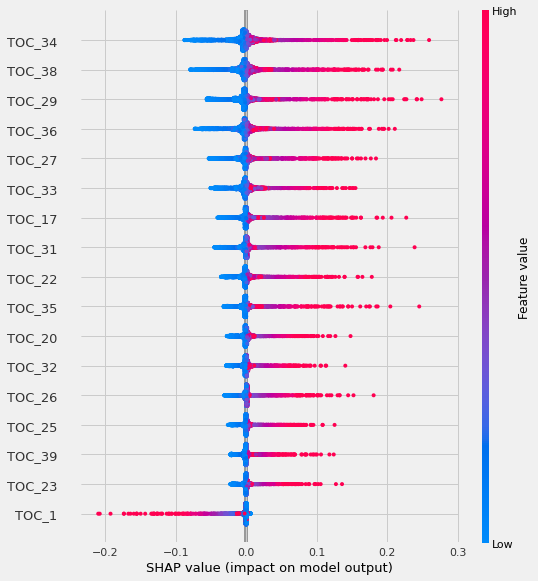

In [ ]:
shap.summary_plot(Shapvalues_mod, Data_mod, max_display=17, feature_names = ['TOC_'+str(i) for i in range(1,40)])

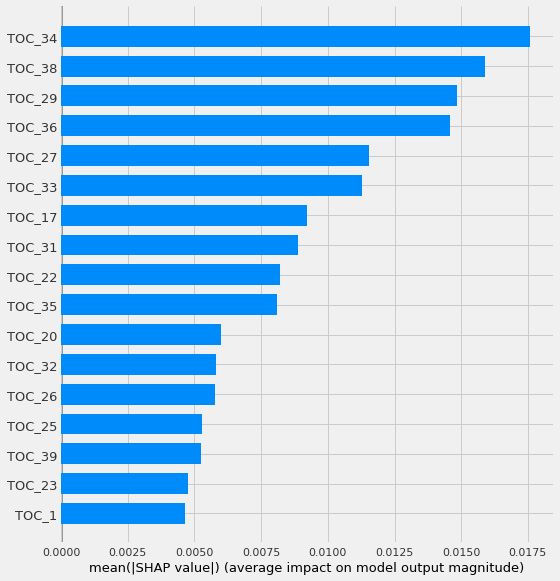

In [ ]:
shap.summary_plot(Shapvalues_mod, Data_mod, max_display=17,plot_type='bar' ,feature_names = ['TOC_'+str(i) for i in range(1,40)])

## LSTM

In [146]:
seed_everything(42)

learning_rate = 0.001
optimizer = Adam(lr=learning_rate)


LSTM_model = Sequential()
LSTM_model.add(LSTM(128, activation='relu', input_shape=(5, x_train.shape[2]), return_sequences=False))
LSTM_model.add(Dropout(0.2))
LSTM_model.add(Dense(1))
    
# Compile the LSTM_model
optimizer = Adam(lr=learning_rate)
LSTM_model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mae'])
    
# Train the LSTM_model
#early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1)
LSTM_model.fit(x_train, y_train, epochs=50, batch_size=64, verbose=0)#), validation_split=0.2)#, callbacks=[early_stop])
    
# Evaluate the LSTM_model on the test set
y_pred = LSTM_model.predict(x_test)
test_y_true = y_test
y_train_true = y_train
y_pred_train = LSTM_model.predict(x_train)

print("RMSE:", np.sqrt(mean_squared_error(np.expm1(test_y_true), np.expm1(y_pred))))
print("MAE:", mean_absolute_error(np.expm1(test_y_true), np.expm1(y_pred)))
print("MSE:", mean_squared_error(np.expm1(test_y_true), np.expm1(y_pred)))
print("R2 Score:", r2_score(np.expm1(test_y_true), np.expm1(y_pred)))
print("Train R2 Score: ", r2_score(y_train_true, y_pred_train))

The `lr` argument is deprecated, use `learning_rate` instead.
`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


RMSE: 21.169058629572266
MAE: 5.034755513845396
MSE: 448.12904326226806
R2 Score: 0.7163424601143419
Train R2 Score:  0.8695508093388187


In [ ]:
import tensorflow as tf

window_size = 7

def createLSTM(first_node, second_node, d_node1, d_node2, window_size):
    lstm1 = tf.keras.layers.LSTM(first_node, input_shape=(window_size, 39), return_sequences=True)
    lstm2 = tf.keras.layers.LSTM(second_node, return_sequences=True)
    flatten = tf.keras.layers.Flatten()
    dense1 = tf.keras.layers.Dense(d_node1)
    dense2 = tf.keras.layers.Dense(d_node2)
    out_node = tf.keras.layers.Dense(1)

    layers = [lstm1, lstm2, flatten, dense1, dense2, out_node]

    model = tf.keras.Sequential(layers)
    model.compile(optimizer='Adam', loss ='mse')

    return model

model = createLSTM(128,64,64,32,7)
model.summary()
model.fit(x_train,y_train, batch_size= 32, epochs=30)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 7, 128)            86016     
                                                                 
 lstm_3 (LSTM)               (None, 7, 64)             49408     
                                                                 
 flatten_1 (Flatten)         (None, 448)               0         
                                                                 
 dense_6 (Dense)             (None, 64)                28736     
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 166,273
Trainable params: 166,273
Non-tr

In [ ]:
print(r2_score(y_train, model.predict(x_train)))
print(r2_score(np.expm1(y_test), np.expm1(model.predict(x_test))))

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


0.8764308929640118
0.7179065786162072


In [ ]:

print("RMSE:", np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(model.predict(x_test)))))
print("MAE:", mean_absolute_error(np.expm1(y_test), np.expm1(model.predict(x_test))))
print("MSE:", mean_squared_error(np.expm1(y_test), np.expm1(model.predict(x_test))))
print("R2 Score:", r2_score(np.expm1(y_test), np.expm1(model.predict(x_test))))
print("Train R2 Score: ", r2_score(y_train_true, y_pred_train))

RMSE: 21.134603509292436
MAE: 5.7694389106858495
MSE: 446.67146549499614
R2 Score: 0.7179065786162072
Train R2 Score:  0.8653391228875981


## Seq2Seq

In [ ]:

from bayes_opt import BayesianOptimization
import numpy as np

def seq_cv(units,  learning_rate, epochs  ,silent=True, nthread=-1):

      # 모델 정의

    window_size = 7

    model = Sequential()

    # Encoder
    model.add(LSTM(2**int(units), activation='relu', input_shape=(window_size, 39)))
    model.add(RepeatVector(1))

    # Decoder
    model.add(LSTM(2**int(units), activation='relu', return_sequences=True))
    model.add(TimeDistributed(Dense(1)))

    model.compile(optimizer=Adam(lr = int(learning_rate)*0.001), loss='mse')
    model.summary()

    model.fit(x_train, y_train, epochs=10*int(epochs), batch_size=32)

    score = r2_score(np.expm1(y_test), np.expm1(model.predict(x_test).reshape(-1,1)))

    

    return score


pbounds = {'units' : (5,9),
                'learning_rate': (1,6),

                'epochs' : (3,9)}

bo=BayesianOptimization(f=seq_cv, pbounds=pbounds, verbose=2, random_state=1 )    


bo.maximize(init_points=25, n_iter=100, acq='ei', xi=0.01)
print(bo.max)
# from xgboost import XGBRegressor
# xgb_model = XGBRegressor(n_estimators = int(bo.max['params']['n_estimators']),
#                          learning_rate = bo.max['params']['learning_rate'], max_depth = int(bo.max['params']['max_depth']), 
#                          gamma =  bo.max['params']['gamma'],reg_lambda = bo.max['params']['reg_lambda'],subsample =bo.max['params']['subsample'])
# xgb_model.fit(x_med_train, y_med_train.values.ravel())
# score = cross_val_score(xgb_model, x_med_train, y_med_train.values.ravel(), cv = 5,scoring='r2')
# cv_score = score.mean()
# print(score)
# print(cv_score)
# xgb_predict = xgb_model.predict(x_med_test)
# xgb_train_predict = xgb_model.predict(x_med_train)

# make_pred_obv_plot(y_med_test,y_med_train,xgb_predict, xgb_train_predict,'Median')


|   iter    |  target   |  epochs   | learni... |   units   |
-------------------------------------------------------------
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 32)                9216      
                                                                 
 repeat_vector_2 (RepeatVect  (None, 1, 32)            0         
 or)                                                             
                                                                 
 lstm_6 (LSTM)               (None, 1, 32)             8320      
                                                                 
 time_distributed_2 (TimeDis  (None, 1, 1)             33        
 tributed)                                                       
                                                                 
Total params: 17,569
Trainable params: 17,569
Non-trainable pa

The `lr` argument is deprecated, use `learning_rate` instead.


Train on 2136 samples
Epoch 1/50
2136/2136 [==============================] - 1s 342us/sample - loss: 2.5636
Epoch 2/50
2136/2136 [==============================] - 0s 133us/sample - loss: 1.2257
Epoch 3/50
2136/2136 [==============================] - 0s 133us/sample - loss: 1.2164
Epoch 4/50
2136/2136 [==============================] - 0s 130us/sample - loss: 1.2357
Epoch 5/50
2136/2136 [==============================] - 0s 129us/sample - loss: 1.2431
Epoch 6/50
2136/2136 [==============================] - 0s 131us/sample - loss: 1.2570
Epoch 7/50
2136/2136 [==============================] - 0s 129us/sample - loss: 1.2264
Epoch 8/50
2136/2136 [==============================] - 0s 131us/sample - loss: 1.2291
Epoch 9/50
2136/2136 [==============================] - 0s 129us/sample - loss: 1.2231
Epoch 10/50
2136/2136 [==============================] - 0s 132us/sample - loss: 1.2207
Epoch 11/50
2136/2136 [==============================] - 0s 130us/sample - loss: 1.2223
Epoch 12/50
2136/21

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_7 (LSTM)               (None, 32)                9216      
                                                                 
 repeat_vector_3 (RepeatVect  (None, 1, 32)            0         
 or)                                                             
                                                                 
 lstm_8 (LSTM)               (None, 1, 32)             8320      
                                                                 
 time_distributed_3 (TimeDis  (None, 1, 1)             33        
 tributed)                                                       
                                                                 
Total params: 17,569
Trainable params: 17,569
Non-trainable params: 0
_________________________________________________________________


The `lr` argument is deprecated, use `learning_rate` instead.


Train on 2136 samples
Epoch 1/40
2136/2136 [==============================] - 1s 373us/sample - loss: 4.0339
Epoch 2/40
2136/2136 [==============================] - 0s 138us/sample - loss: 1.3842
Epoch 3/40
2136/2136 [==============================] - 0s 139us/sample - loss: 1.2471
Epoch 4/40
2136/2136 [==============================] - 0s 137us/sample - loss: 1.2347
Epoch 5/40
2136/2136 [==============================] - 0s 139us/sample - loss: 1.2265
Epoch 6/40
2136/2136 [==============================] - 0s 138us/sample - loss: 1.2291
Epoch 7/40
2136/2136 [==============================] - 0s 137us/sample - loss: 1.2271
Epoch 8/40
2136/2136 [==============================] - 0s 139us/sample - loss: 1.2203
Epoch 9/40
2136/2136 [==============================] - 0s 139us/sample - loss: 1.2213
Epoch 10/40
2136/2136 [==============================] - 0s 137us/sample - loss: 1.2223
Epoch 11/40
2136/2136 [==============================] - 0s 138us/sample - loss: 1.2160
Epoch 12/40
2136/21

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 64)                26624     
                                                                 
 repeat_vector_4 (RepeatVect  (None, 1, 64)            0         
 or)                                                             
                                                                 
 lstm_10 (LSTM)              (None, 1, 64)             33024     
                                                                 
 time_distributed_4 (TimeDis  (None, 1, 1)             65        
 tributed)                                                       
                                                                 
Total params: 59,713
Trainable params: 59,713
Non-trainable params: 0
_________________________________________________________________


The `lr` argument is deprecated, use `learning_rate` instead.


Train on 2136 samples
Epoch 1/40
2136/2136 [==============================] - 1s 394us/sample - loss: 3.9165
Epoch 2/40
2136/2136 [==============================] - 0s 135us/sample - loss: 1.2669
Epoch 3/40
2136/2136 [==============================] - 0s 132us/sample - loss: 1.2309
Epoch 4/40
2136/2136 [==============================] - 0s 134us/sample - loss: 1.2300
Epoch 5/40
2136/2136 [==============================] - 0s 131us/sample - loss: 1.2225
Epoch 6/40
2136/2136 [==============================] - 0s 133us/sample - loss: 1.2234
Epoch 7/40
2136/2136 [==============================] - 0s 131us/sample - loss: 1.2277
Epoch 8/40
2136/2136 [==============================] - 0s 131us/sample - loss: 1.2297
Epoch 9/40
2136/2136 [==============================] - 0s 130us/sample - loss: 1.2162
Epoch 10/40
2136/2136 [==============================] - 0s 129us/sample - loss: 1.2402
Epoch 11/40
2136/2136 [==============================] - 0s 133us/sample - loss: 1.2167
Epoch 12/40
2136/21

KeyboardInterrupt: 

In [ ]:
seed_everything(21)
model = Sequential()

# Encoder
model.add(LSTM(64, activation='relu', input_shape=(7, 39)))
model.add(RepeatVector(1))

# Decoder
model.add(LSTM(64, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(1)))

model.compile(optimizer=Adam(lr=0.01), loss='mse')
model.summary()

model.fit(x_train, y_train, epochs=50, batch_size=64)

The `lr` argument is deprecated, use `learning_rate` instead.
`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


RMSE: 21.169058629572266
MAE: 5.034755513845396
MSE: 448.12904326226806
R2 Score: 0.7163424601143419
Train R2 Score:  0.8695508093388187


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, RepeatVector, TimeDistributed

window_size = 7

model = Sequential()

# Encoder
model.add(GRU(256, activation='relu', input_shape=(window_size, 39)))
model.add(RepeatVector(1))

# Decoder
model.add(GRU(256, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(1)))

model.compile(optimizer=Adam(lr=0.003), loss='mse')
model.summary()

model.fit(x_train, y_train, epochs=90, batch_size=128)


Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_3 (GRU)                 (None, 256)               228096    
                                                                 
 repeat_vector_7 (RepeatVect  (None, 1, 256)           0         
 or)                                                             
                                                                 
 gru_4 (GRU)                 (None, 1, 256)            394752    
                                                                 
 time_distributed_7 (TimeDis  (None, 1, 1)             257       
 tributed)                                                       
                                                                 
Total params: 623,105
Trainable params: 623,105
Non-trainable params: 0
_________________________________________________________________


The `lr` argument is deprecated, use `learning_rate` instead.


Train on 2136 samples
Epoch 1/90
2136/2136 [==============================] - 2s 781us/sample - loss: 2.4800
Epoch 2/90
2136/2136 [==============================] - 0s 48us/sample - loss: 1.2607
Epoch 3/90
2136/2136 [==============================] - 0s 47us/sample - loss: 1.2266
Epoch 4/90
2136/2136 [==============================] - 0s 48us/sample - loss: 1.2144
Epoch 5/90
2136/2136 [==============================] - 0s 48us/sample - loss: 1.2123
Epoch 6/90
2136/2136 [==============================] - 0s 49us/sample - loss: 1.2288
Epoch 7/90
2136/2136 [==============================] - 0s 51us/sample - loss: 1.2250
Epoch 8/90
2136/2136 [==============================] - 0s 47us/sample - loss: 1.2212
Epoch 9/90
2136/2136 [==============================] - 0s 48us/sample - loss: 1.2486
Epoch 10/90
2136/2136 [==============================] - 0s 47us/sample - loss: 1.2230
Epoch 11/90
2136/2136 [==============================] - 0s 47us/sample - loss: 1.2127
Epoch 12/90
2136/2136 [======

KeyboardInterrupt: 

In [ ]:

print("RMSE:", np.sqrt(mean_squared_error(np.expm1(test_y_true), np.expm1(y_pred))))
print("MAE:", mean_absolute_error(np.expm1(test_y_true), np.expm1(y_pred)))
print("MSE:", mean_squared_error(np.expm1(test_y_true), np.expm1(y_pred)))
print("R2 Score:", r2_score(np.expm1(test_y_true), np.expm1(y_pred)))
print("Train R2 Score: ", r2_score(y_train_true, y_pred_train))

In [ ]:
print(r2_score(y_train, model.predict(x_train).reshape(-1,1)))
print(r2_score(np.expm1(y_test), np.expm1(model.predict(x_test).reshape(-1,1))))

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


0.026639699810728446
-0.0706937662212268


In [ ]:


print(mean_absolute_error(np.expm1(y_train), np.expm1(model.predict(x_train)).reshape(-1,1)))
print(mean_absolute_error(np.expm1(y_test), np.expm1(model.predict(x_test)).reshape(-1,1)))

print(r2_score(np.expm1(y_train), np.expm1(model.predict(x_train)).reshape(-1,1)))
print(r2_score(np.expm1(y_test), np.expm1(model.predict(x_test)).reshape(-1,1)))

67/67 [==============================] - 0s 2ms/step
6.184413714609832
23/23 [==============================] - 0s 2ms/step
6.494282277975293
67/67 [==============================] - 0s 2ms/step
0.4954500762807028
23/23 [==============================] - 0s 2ms/step
0.5723365532467952


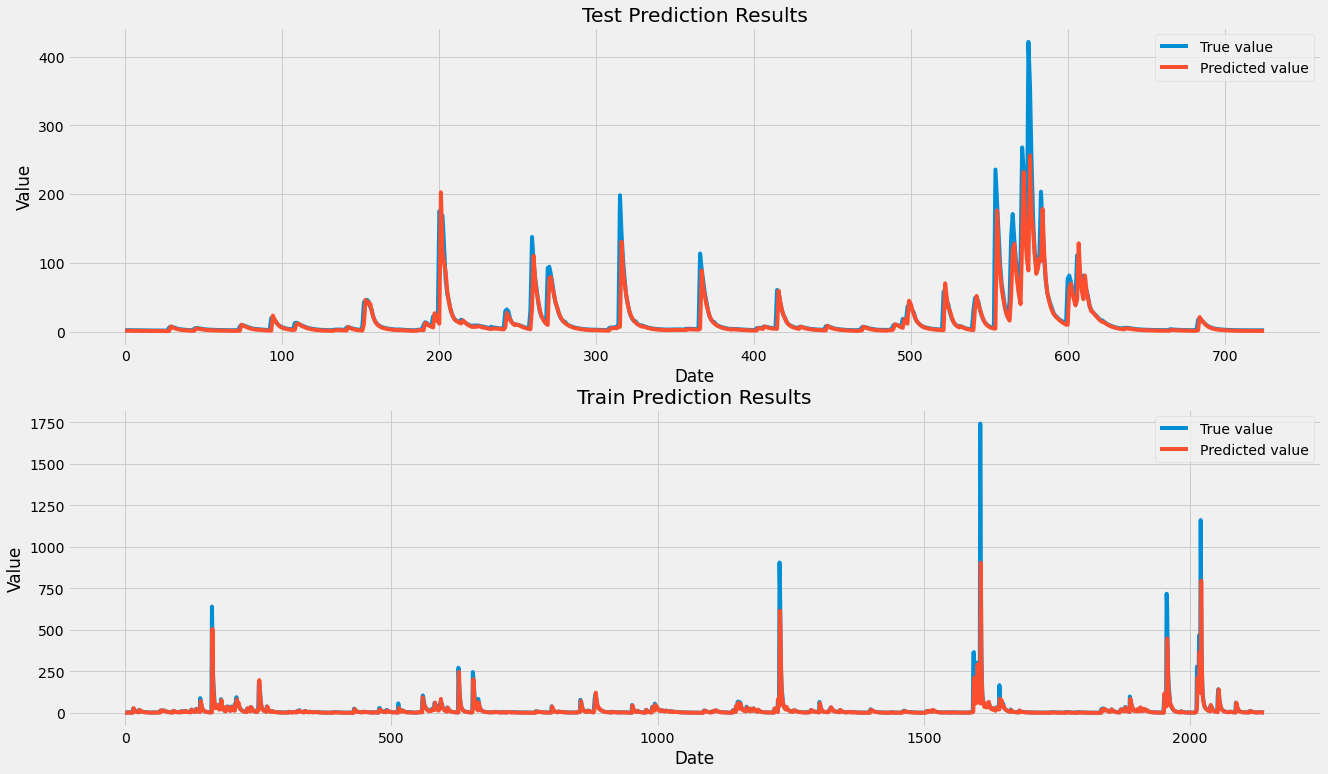

In [ ]:
# 날짜 인덱스 생성
start_date = '2019-01-6'
end_date = '2020-12-31'
date_index = pd.date_range(start=start_date, end=end_date, freq='D')

y = pd.DataFrame(np.expm1(model.predict(x_train).reshape(-1,1)))
y['true'] = np.exp(y_train)

x = pd.DataFrame(np.expm1(model.predict(x_test).reshape(-1,1)))
x['date'] = date_index
x['true'] = np.exp(y_test)
x.set_index('date')

# 인덱스를 데이터프레임의 인덱스로 설정

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(20, 12))
ax1.plot(x['true'], label='True value')
ax1.plot(x[0], label='Predicted value')

#ax1.set_index(date_index, inplace=True)
ax1.set_xlabel('Date')
ax1.set_ylabel('Value')
ax1.set_title('Test Prediction Results')
ax1.legend()

ax2.plot(y['true'], label='True value')
ax2.plot(y[0], label='Predicted value')

ax2.set_xlabel('Date')
ax2.set_ylabel('Value')
ax2.set_title('Train Prediction Results')
ax2.legend()

plt.show()

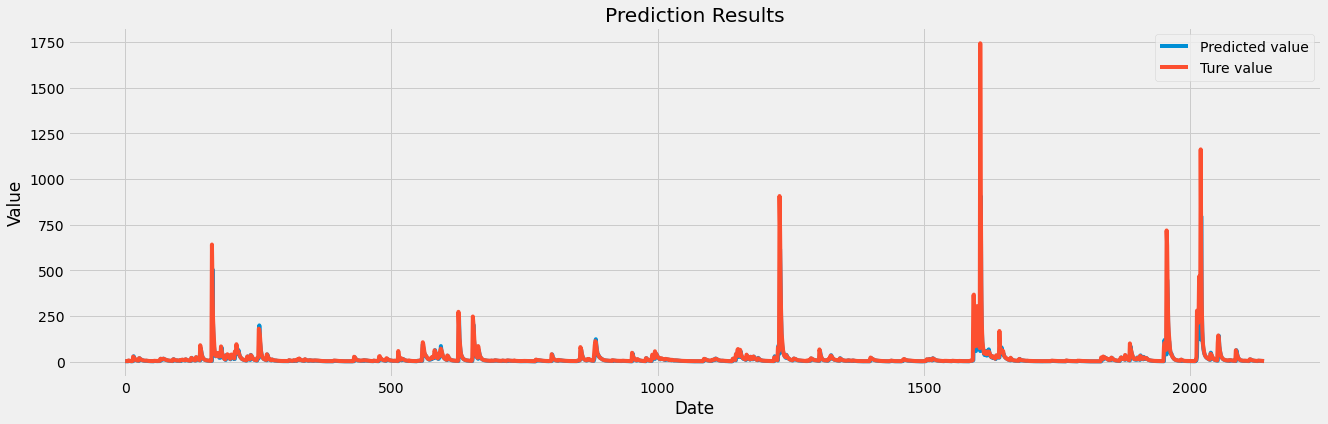

In [ ]:
plt.figure(figsize=(20, 6))
plt.plot(y[0], label='Predicted value')
plt.plot(y['true'], label='Ture value')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Prediction Results')
plt.legend()
plt.show()

# 결과

In [110]:
## GRU
# 날짜 인덱스 생성
start_date = '2019-01-6'
end_date = '2020-12-31'
date_index = pd.date_range(start=start_date, end=end_date, freq='D')

y = pd.DataFrame(np.expm1(GRU_model.predict(x_train).reshape(-1,1)))
y['true'] = np.exp(y_train)
y['date'] = train_date


x = pd.DataFrame(np.expm1(GRU_model.predict(x_test).reshape(-1,1)))
x['date'] = test_date
x['true'] = np.exp(y_test)
x.set_index('date')


,0,true
date,,
2019-01-06,1.777516,2.512
2019-01-07,1.729585,2.475
2019-01-08,1.692299,2.438
2019-01-09,1.658806,2.398
2019-01-10,1.621318,2.370
...,...,...
2020-12-27,1.500816,2.267
2020-12-28,1.472094,2.251
2020-12-29,1.450920,2.233


In [ ]:
x['date'] = test_date

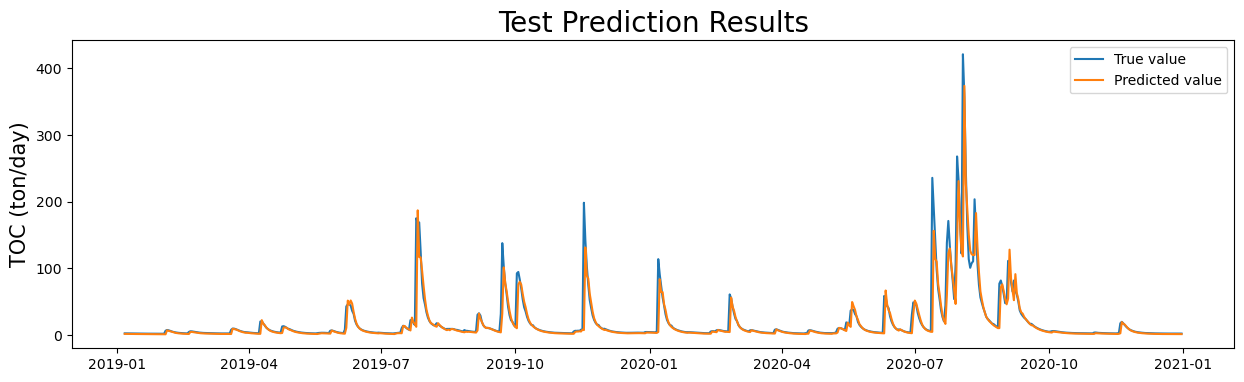

In [148]:

# 인덱스를 데이터프레임의 인덱스로 설정
import matplotlib.style as style
plt.figure(figsize=(15, 4))
plt.rcParams.update({'font.size': 40})
style.use('default')
plt.plot(x['date'],x['true'], label='True value')
plt.plot(x['date'],x[0], label='Predicted value')
#plt.set_index(date_index, inplace=True)

plt.title('Test Prediction Results', fontsize=20)
plt.ylabel('TOC (ton/day)', fontsize= 15)
plt.legend()



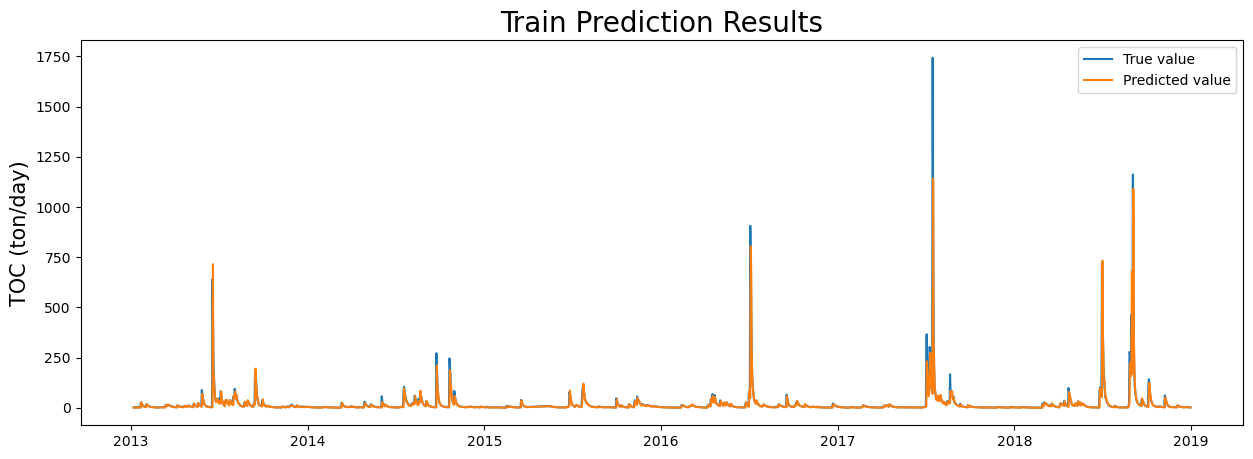

In [150]:

# 인덱스를 데이터프레임의 인덱스로 설정
import matplotlib.style as style
plt.figure(figsize=(15, 5))
plt.rcParams.update({'font.size': 40})
style.use('default')
plt.plot(y['date'],y['true'], label='True value')
plt.plot(y['date'],y[0], label='Predicted value')
#plt.set_indey(date_indey, inplace=True)

plt.title('Train Prediction Results', fontsize=20)
plt.ylabel('TOC (ton/day)', fontsize= 15)
plt.legend()



In [152]:
from math import sqrt
import matplotlib.style as style
## Train, Test, Overall R-squared + Plot Function
def make_pred_obv_plot(y_test,y_train,predict_test,predict_train,title):
    from matplotlib.offsetbox import AnchoredText
    import matplotlib.style as style
    test_r2 = round(r2_score(y_test, predict_test),3)
    train_r2 =round(r2_score(y_train, predict_train),3)
    #total_data = pd.concat([y_test,y_train])
    #total_pred = np.concatenate([predict_test,predict_train])
    #total_r2 = round(r2_score(total_data,total_pred),3)
    style.use('default')
    print(test_r2, 'test r-squared')
    print(train_r2, 'train r-squared')
    
    print(sqrt(mean_squared_error(y_test, predict_test)), 'test RMSE')
    print(sqrt(mean_squared_error(y_train, predict_train)), 'train RMSE')
    
    fig, ax = plt.subplots(figsize=(5,5))

    ax.scatter(y_train,predict_train,label='train',alpha=.5, marker='o', facecolor='none',edgecolors='b')
    ax.scatter(y_test,predict_test, label='test', alpha=.5, marker='s',color = 'red')    
    ## lim 설정
    lims = [np.min([ax.get_xlim(),ax.get_ylim()]), np.max([ax.get_xlim(),ax.get_ylim()]-500)]
    ax.plot(lims,lims,zorder=0, color = 'black')
    ax.set_xlim(lims)
    ax.set_xlabel('Obv')
    ax.set_ylabel('Pred')
    ax.set_ylim(lims)
    ax.legend()
    ax.set_title(title)
    text = 'Train R-squared : ' + str(train_r2) + '\nTest R-squared : '+str(test_r2)#+'\n#Overall R-squared : ' #+str(total_r2)
    anchored_text = AnchoredText(text,loc=4)
    ax.add_artist(anchored_text)




0.721 test r-squared
0.456 train r-squared
20.995891708492724 test RMSE
53.3028798280293 train RMSE


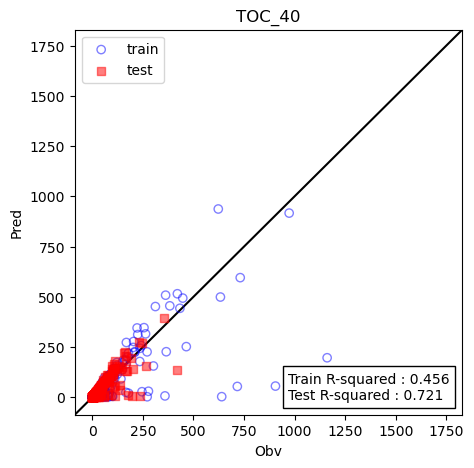

In [ ]:
make_pred_obv_plot(np.expm1(y_test),np.expm1(y_train),np.expm1(model.predict(x_test)).reshape(-1,1),np.expm1(model.predict(x_train)).reshape(-1,1),title='TOC_40')

0.731 test r-squared
0.456 train r-squared
20.596664576789916 test RMSE
53.32714726509414 train RMSE


TypeError: unsupported operand type(s) for -: 'list' and 'int'

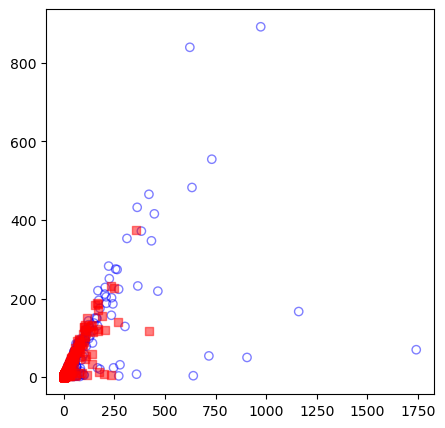

In [153]:
make_pred_obv_plot(np.expm1(y_test),np.expm1(y_train),np.expm1(GRU_model.predict(x_test)).reshape(-1,1),np.expm1(GRU_model.predict(x_train)).reshape(-1,1),title='TOC_40')